# Tic-Tac-Toe Assignment
 
- By Anuprabha

#### Objective:

         In this assignment,the objective is to build an RL agent that learns to play Numerical Tic-Tac-Toe with odd numbers (the agent will always make the first move). The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. If the agent wins the game, it gets 10 points, if the environment wins, the agent loses 10 points. And if the game ends in a draw, it gets 0. Also, you want the agent to win in as few moves as possible, so for each move, it gets a -1 point.


#### layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file .

In [1]:
from TCGame_Env import TicTacToe   # class from environment file

import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt
import time 

In [2]:
## object for envirnment
env = TicTacToe()

In [3]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [4]:
# check on Q_state
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [5]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):
    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [6]:
# check on all the valid actions -- for agent
valid_actions(env.state)

[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

In [7]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy 


In [8]:
# Defining epsilon-greedy policy. 

def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*time)
    z = np.random.random()
        
    if z > epsilon:   #Exploitation: use q-value
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   
    else:              #Exploration: random action
        agent_actions, env_actions = env.action_space(state)
        action = random.choice(list(agent_actions))
    return action

#### Tracking the state-action pairs for checking convergence:

In [9]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)

Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

In [10]:
# Initialise states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-8-x-x-x-9-x-x-x',(2, 1)),
                       ('x-3-x-x-1-x-x-x-x',(7,5)),('X-1-X-X-X-X-6-X-X',(4,3))]    #select some Q-values
    for q_value in Sample_Qvalues:
        state = q_value[0]
        action = q_value[1]
        state1 = Q_state(state)
        States_track[state1][action] = []  
        
initialise_tracking_states()

In [11]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [12]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [13]:
initialise_tracking_states()

#### Define hyperparameters  :

In [14]:
#Defining parameters for the training

EPISODES = 5000000
LR = 0.01                   # learning rate
GAMMA = 0.9               # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
threshold = 5000        # to save States_track
policy_threshold = 30000  # for saving Q-dict

### Q-update loop ---write your code here

In [15]:
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe()       # environment
    curr_state = env.state    
    terminal_flag = False  
    add_to_dict(curr_state) 
    total_reward = 0
    

    while not terminal_flag:
        current_state_new = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)
        next_state, reward, terminal_flag = env.step(curr_state, curr_action)

        next_state_new = Q_state(next_state)
        add_to_dict(next_state)

        # q[s][a] += LR(r -q[s][a])
        if terminal_flag:
            Q_dict[current_state_new][curr_action] += LR * (
                (reward - Q_dict[current_state_new][curr_action]))
            
        # q[s][a] += LR((r +gamma*(max(q[s'][a]))-q[s][a])
        else:
            max_next = max(Q_dict[next_state_new],
                           key=Q_dict[next_state_new].get)
            Q_dict[current_state_new][curr_action] += LR * (
                (reward + (GAMMA * (Q_dict[next_state_new][max_next]))) -
                Q_dict[current_state_new][curr_action])

        curr_state = next_state
        total_reward += reward
        
    # tracking states
    if (episode == threshold-1):        
        initialise_tracking_states()
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracked')
 
    # tracking policies
    if ((episode+1)% policy_threshold) == 0:  #saves Q-dict
        save_obj(Q_dict,'Policy_Q_dict_tracked')  
        

elapsed_time = time.time() - start_time
save_obj(States_track, 'States_tracked')
save_obj(Q_dict, 'Policy_Q_dict_tracked')
print(elapsed_time)

3700.8134336471558


#### Check the Q-dictionary

In [17]:
len(Q_dict)

1223331

In [18]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): 3.5034512480806184,
              (0, 3): 3.4690347044989616,
              (0, 5): 3.7745934607416745,
              (0, 7): -0.09634124430297764,
              (0, 9): -0.09566940639467855,
              (1, 1): 3.4667534627404777,
              (1, 3): 3.1289777436355672,
              (1, 5): 3.3640517007645236,
              (1, 7): -0.23403944144078737,
              (1, 9): -0.41983661057552063,
              (2, 1): 3.618590826602271,
              (2, 3): 3.036178943851504,
              (2, 5): 3.856723606781445,
              (2, 7): -1.0670511301858958,
              (2, 9): 0.3036487032007197,
              (3, 1): 3.543512758201365,
              (3, 3): 3.1950677573525565,
              (3, 5): 3.1685094646869603,
              (3, 7): 0.5591426315382848,
              (3, 9): -0.40184467439822114,
              (4, 1): 3.7762900621238984,
              (4, 3): 3.370933590560021,
              (4, 5): 3.5393811

#### Check the states tracked for Q-values convergence
(non-evaluative)

### Epsilon - decay check

In [24]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

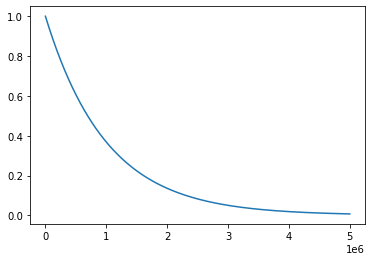

In [25]:
plt.plot(time, epsilon)
plt.show()